# 1. 18-37632-1 Kumar,Niloy
# 2. 18-36353-1 Chaity,Nila Maitra
# 3. 18-36368-1 Pyaasa, Sabikunnahar Talukder

In [1]:
import numpy as np
import cv2
import tensorflow
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_path='dataset\\train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

img_size=48
data=[]
label=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            pass
            


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
[0, 1, 2, 3, 4, 5, 6]


In [12]:
data[0].shape

(48, 48)

In [6]:
type(data)

numpy.ndarray

In [9]:
data[0].shape

(48, 48)

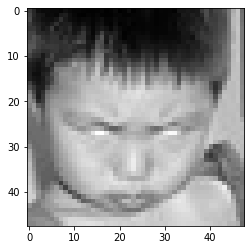

In [13]:
plt.imshow(data[0],cmap="gray")

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,label,test_size=0.1)

In [42]:
p_model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(48,48,1)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(7),
tf.keras.layers.Softmax()])
p_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
p_model.fit(train_data, train_target, epochs=3)

Train on 25838 samples
Epoch 1/3
25838/25838 [==============================] - 2s 68us/sample - loss: 1.8923 - accuracy: 0.2566
Epoch 2/3
25838/25838 [==============================] - 2s 63us/sample - loss: 1.8668 - accuracy: 0.2820
Epoch 3/3
25838/25838 [==============================] - 2s 63us/sample - loss: 1.8457 - accuracy: 0.3046


In [65]:
data.shape[1:]

(100, 100, 1)

# MODEL 1

In [88]:
emotion_model = Sequential()

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(32, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
emotion_model.fit(train_data, train_target, epochs=100)

Train on 25838 samples
Epoch 1/100
25838/25838 [==============================] - 4s 145us/sample - loss: 1.8832 - accuracy: 0.2563
Epoch 2/100
25838/25838 [==============================] - 3s 133us/sample - loss: 1.8271 - accuracy: 0.3231
Epoch 3/100
25838/25838 [==============================] - 3s 134us/sample - loss: 1.7964 - accuracy: 0.3503
Epoch 4/100
25838/25838 [==============================] - 3s 133us/sample - loss: 1.7863 - accuracy: 0.3607
Epoch 5/100
25838/25838 [==============================] - 3s 134us/sample - loss: 1.7727 - accuracy: 0.3739
Epoch 6/100
25838/25838 [==============================] - 3s 134us/sample - loss: 1.7622 - accuracy: 0.3863
Epoch 7/100
25838/25838 [==============================] - 3s 135us/sample - loss: 1.7549 - accuracy: 0.3941
Epoch 8/100
25838/25838 [==============================] - 3s 135us/sample - loss: 1.7452 - accuracy: 0.4069
Epoch 9/100
25838/25838 [==============================] - 3s 135us/sample - loss: 1.7372 - accuracy: 0.4

# MODEL 2

In [89]:
emotion_model = Sequential()

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
emotion_model.fit(train_data, train_target, epochs=100)

Train on 25838 samples
Epoch 1/100
25838/25838 [==============================] - 4s 150us/sample - loss: 1.8530 - accuracy: 0.2935
Epoch 2/100
25838/25838 [==============================] - 4s 140us/sample - loss: 1.7902 - accuracy: 0.3598
Epoch 3/100
25838/25838 [==============================] - 4s 140us/sample - loss: 1.7531 - accuracy: 0.4003
Epoch 4/100
25838/25838 [==============================] - 4s 142us/sample - loss: 1.7296 - accuracy: 0.4253
Epoch 5/100
25838/25838 [==============================] - 4s 141us/sample - loss: 1.7101 - accuracy: 0.4455
Epoch 6/100
25838/25838 [==============================] - 4s 141us/sample - loss: 1.6963 - accuracy: 0.4611
Epoch 7/100
25838/25838 [==============================] - 4s 141us/sample - loss: 1.6834 - accuracy: 0.4730
Epoch 8/100
25838/25838 [==============================] - 4s 142us/sample - loss: 1.6694 - accuracy: 0.4884
Epoch 9/100
25838/25838 [==============================] - 4s 141us/sample - loss: 1.6583 - accuracy: 0.5

In [30]:
emotion_model = Sequential()

name="Model 4"

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
tensorboard= TensorBoard(log_dir="logs\{}".format(name))
emotion_model.compile(optimizer='adam',
             loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
emotion_model.fit(train_data, train_target, epochs=5,callbacks=[tensorboard])

Train on 25838 samples
Epoch 1/5
25838/25838 [==============================] - 5s 179us/sample - loss: 1.8624 - accuracy: 0.2847
Epoch 2/5
25838/25838 [==============================] - 4s 164us/sample - loss: 1.7861 - accuracy: 0.3646
Epoch 3/5
25838/25838 [==============================] - 4s 161us/sample - loss: 1.7439 - accuracy: 0.4128
Epoch 4/5
25838/25838 [==============================] - 4s 163us/sample - loss: 1.7204 - accuracy: 0.4358
Epoch 5/5
25838/25838 [==============================] - 4s 163us/sample - loss: 1.6985 - accuracy: 0.4601


In [36]:
emotion_model = Sequential()

name="Model 6"

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(256, activation='relu'))
emotion_model.add(Dropout(0.2))
emotion_model.add(Dense(7, activation='softmax'))
tensorboard= TensorBoard(log_dir="logs\{}".format(name))
emotion_model.compile(optimizer='adam',
             loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
emotion_model.fit(train_data, train_target, epochs=100,callbacks=[tensorboard])

Train on 25838 samples
Epoch 1/100
25838/25838 [==============================] - 5s 180us/sample - loss: 1.8929 - accuracy: 0.2633
Epoch 2/100
25838/25838 [==============================] - 4s 166us/sample - loss: 1.7836 - accuracy: 0.3678
Epoch 3/100
25838/25838 [==============================] - 4s 165us/sample - loss: 1.7250 - accuracy: 0.4299
Epoch 4/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6924 - accuracy: 0.4656
Epoch 5/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6668 - accuracy: 0.4933
Epoch 6/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6409 - accuracy: 0.5207
Epoch 7/100
25838/25838 [==============================] - 4s 168us/sample - loss: 1.6223 - accuracy: 0.5399
Epoch 8/100
25838/25838 [==============================] - 4s 169us/sample - loss: 1.6010 - accuracy: 0.5605
Epoch 9/100
25838/25838 [==============================] - 4s 169us/sample - loss: 1.5807 - accuracy: 0.5

In [6]:
emotion_model = Sequential()

name="Model 7"

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(256, activation='relu'))
emotion_model.add(Dropout(0.1))
emotion_model.add(Dense(7, activation='softmax'))
tensorboard= TensorBoard(log_dir="logs\{}".format(name))
emotion_model.compile(optimizer='adam',
             loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
emotion_model.fit(train_data, train_target, epochs=100,callbacks=[tensorboard])

Train on 25838 samples
Epoch 1/100
25838/25838 [==============================] - 7s 258us/sample - loss: 1.8252 - accuracy: 0.3265
Epoch 2/100
25838/25838 [==============================] - 4s 168us/sample - loss: 1.7285 - accuracy: 0.4265
Epoch 3/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6883 - accuracy: 0.4699
Epoch 4/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6549 - accuracy: 0.5042
Epoch 5/100
25838/25838 [==============================] - 4s 167us/sample - loss: 1.6245 - accuracy: 0.5368
Epoch 6/100
25838/25838 [==============================] - 4s 170us/sample - loss: 1.5945 - accuracy: 0.5684
Epoch 7/100
25838/25838 [==============================] - 4s 166us/sample - loss: 1.5675 - accuracy: 0.5963
Epoch 8/100
25838/25838 [==============================] - 4s 162us/sample - loss: 1.5364 - accuracy: 0.6281
Epoch 9/100
25838/25838 [==============================] - 4s 166us/sample - loss: 1.5129 - accuracy: 0.6

In [1]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 8900), started 14:15:38 ago. (Use '!kill 8900' to kill it.)

In [8]:
emotion_model.save("model-new85%")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-new85%\assets


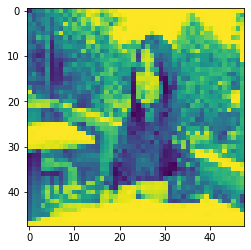

In [10]:
test_data_img=cv2.imread("download7.jpg")
test_data_img=cv2.cvtColor(test_data_img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(test_data_img,(48,48))
test_data_img=np.array(resized)/255.0


reshaped=np.reshape(test_data_img,(1,48,48,1))
result=model.predict(reshaped)
test_label=np.argmax(result,axis=1)[0]
plt.imshow(test_data_img)


In [11]:
label_dict
for i,j in label_dict.items():
    if j==test_label:
        print(i)

sad
